In [61]:
!pip install pandas

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
^C
ERROR: Operation cancelled by user


In [5]:
!pip install seaborn

In [6]:
!pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:
# 3. 데이터 병합
# Identity_ID를 기준으로 데이터 병합
merged_data = (
    identities
    .merge(level_stats, left_on='ID', right_on='Identity_ID', how='left')
    .merge(uptie_stats, on='Identity_ID', how='left')
    .merge(resist_infos, on='Identity_ID', how='left')
    .merge(stagger_thresholds, on='Identity_ID', how='left')
    .merge(skills, on='Identity_ID', how='left')
    .merge(behaviors, on='Identity_ID', how='left')
)

merged_data
print(merged_data.info())

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json  # JSON 데이터를 처리하기 위한 모듈

# 1. 데이터 로드
identities = pd.read_csv('./csv/Identities.csv')
level_stats = pd.read_csv('./csv/Levelstats.csv')
uptie_stats = pd.read_csv('./csv/Uptiestats.csv')
resist_infos = pd.read_csv('./csv/ResistInfos.csv')
stagger_thresholds = pd.read_csv('./csv/StaggerThresholds.csv')
skills = pd.read_csv('./csv/IdentitiesSkills.csv')
behaviors = pd.read_csv('./csv/IdentitiesBehaviors.csv')
keywords = pd.read_csv('./csv/Keywords.csv')

# 2. 데이터 정제
# a. Uptiestats에서 Speed를 "MinSpeed-MaxSpeed" 형태에서 분리
uptie_stats[['MinSpeed', 'MaxSpeed']] = uptie_stats['Speed'].str.split('-', expand=True).astype(int)

# b. JSON 형식의 Effect_Data 컬럼 처리
# JSON 데이터를 개별 컬럼으로 분리 (필요한 경우)
#skills['Effect_Data'] = skills['Effect_Data'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})
# 예: 주요 키를 추출하여 새 컬럼 생성
#skills['Effect_Description'] = skills['Effect_Data'].apply(lambda x: x.get('description', None))

# c. Release_Date를 날짜 형식으로 변환 후 월 단위로 변환
identities['Release_Date'] = pd.to_datetime(identities['Release_Date'], format='%Y-%m-%d')
identities['Release_Month'] = identities['Release_Date'].dt.to_period('M')

In [2]:
identities

,ID,Name,Rarity,Skill_1_Type,Skill_1_Sin_Affinity,Skill_2_Type,Skill_2_Sin_Affinity,Skill_3_Type,Skill_3_Sin_Affinity,Defense_Type,Defense_Sin_Affinity,Release_Date,Release_Month
0,10101,[LCB Sinner] Yi Sang,1,SLASH,Gloom,PENETRATE,Envy,SLASH,Sloth,GUARD,Gloom,2023-02-27,2023-02
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,PENETRATE,Gloom,PENETRATE,Gluttony,HIT,Sloth,GUARD,Gluttony,2023-02-27,2023-02
2,10103,[Blade Lineage Salsu] Yi Sang,3,SLASH,Pride,SLASH,Wrath,SLASH,Envy,COUNTER,Pride,2023-02-27,2023-02
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,PENETRATE,Gluttony,HIT,Sloth,PENETRATE,Pride,EVADE,Sloth,2023-06-15,2023-06
4,10105,[Molar Office Fixer] Yi Sang,2,PENETRATE,Lust,HIT,Sloth,HIT,Wrath,GUARD,Sloth,2023-09-14,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,SLASH,Sloth,SLASH,Gluttony,SLASH,Gloom,GUARD,Sloth,2023-08-10,2023-08
122,11207,[Twinhook Pirates First Mate] Gregor,3,PENETRATE,Sloth,PENETRATE,Pride,PENETRATE,Gloom,EVADE,Gloom,2023-11-16,2023-11
123,11208,[Kurokumo Clan Captain] Gregor,2,SLASH,Sloth,HIT,Lust,SLASH,Gloom,GUARD,Lust,2024-02-22,2024-02
124,11209,[Edgar Family Heir] Gregor,3,SLASH,Envy,SLASH,Gloom,SLASH,Lust,EVADE,Gloom,2024-04-04,2024-04


In [3]:
identities_df = identities.drop(columns=['Skill_1_Type','Skill_1_Sin_Affinity','Skill_2_Type','Skill_2_Sin_Affinity','Skill_3_Type','Skill_3_Sin_Affinity'])

In [4]:
identities_df = identities_df.drop(columns=['Defense_Type','Defense_Sin_Affinity'])

In [5]:
identities_df

,ID,Name,Rarity,Release_Date,Release_Month
0,10101,[LCB Sinner] Yi Sang,1,2023-02-27,2023-02
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2023-02-27,2023-02
2,10103,[Blade Lineage Salsu] Yi Sang,3,2023-02-27,2023-02
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,2023-06-15,2023-06
4,10105,[Molar Office Fixer] Yi Sang,2,2023-09-14,2023-09
...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,2023-08-10,2023-08
122,11207,[Twinhook Pirates First Mate] Gregor,3,2023-11-16,2023-11
123,11208,[Kurokumo Clan Captain] Gregor,2,2024-02-22,2024-02
124,11209,[Edgar Family Heir] Gregor,3,2024-04-04,2024-04


In [6]:
# 교정 후 데이터 타입 확인
identities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             126 non-null    int64         
 1   Name           126 non-null    object        
 2   Rarity         126 non-null    int64         
 3   Release_Date   126 non-null    datetime64[ns]
 4   Release_Month  126 non-null    period[M]     
dtypes: datetime64[ns](1), int64(2), object(1), period[M](1)
memory usage: 5.1+ KB


In [7]:
print(identities_df['Rarity'].value_counts())

Rarity
3    64
2    50
1    12
Name: count, dtype: int64


In [8]:
# 'Release_Date'에서 년, 월, 일 추출하여 새로운 열에 추가
identities_df['Release_Year'] = identities_df['Release_Date'].dt.year
identities_df['Release_Month'] = identities_df['Release_Date'].dt.month
identities_df['Release_Day'] = identities_df['Release_Date'].dt.day

In [9]:
# 중앙값과 평균값 계산
release_month_median = identities_df['Release_Month'].median()
release_month_mean = identities_df['Release_Month'].mean()

print(f"Release_Month 중앙값: {release_month_median}")
print(f"Release_Month 평균값: {release_month_mean}")

Release_Month 중앙값: 4.0
Release_Month 평균값: 5.142857142857143


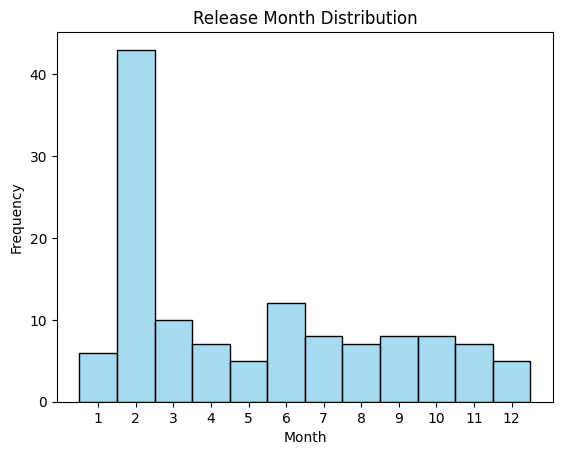

In [10]:
# 히스토그램 시각화
sns.histplot(identities_df['Release_Month'], kde=False, bins=12, discrete=True, color='skyblue')
plt.title('Release Month Distribution')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))  # 1부터 12까지 월 표시
plt.show()

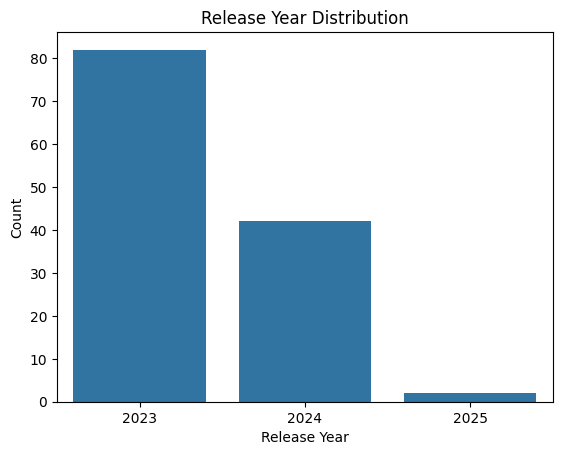

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Release_Year 값의 빈도 수를 구합니다.
release_year_counts = identities_df['Release_Year'].value_counts().sort_index()

# barplot으로 시각화
sns.barplot(x=release_year_counts.index.astype(str), y=release_year_counts.values)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

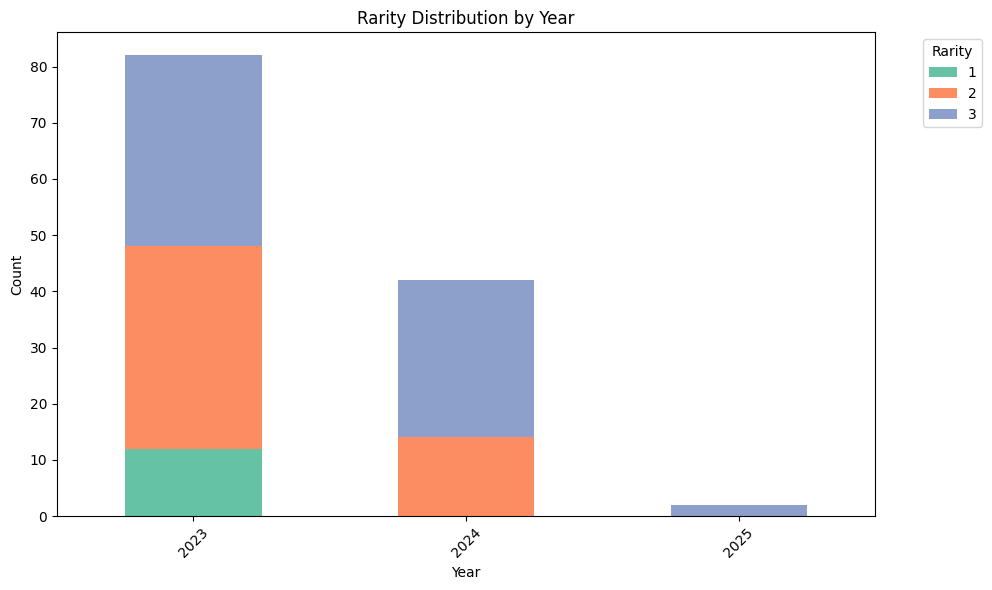

In [12]:
# 년도별로 rarity 분포 집계
rarity_yearly_distribution = identities_df.groupby(['Release_Year', 'Rarity']).size().unstack(fill_value=0)

# 시각화
rarity_yearly_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2", n_colors=len(rarity_yearly_distribution.columns)))
plt.title('Rarity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # 레이아웃 조정
plt.show()

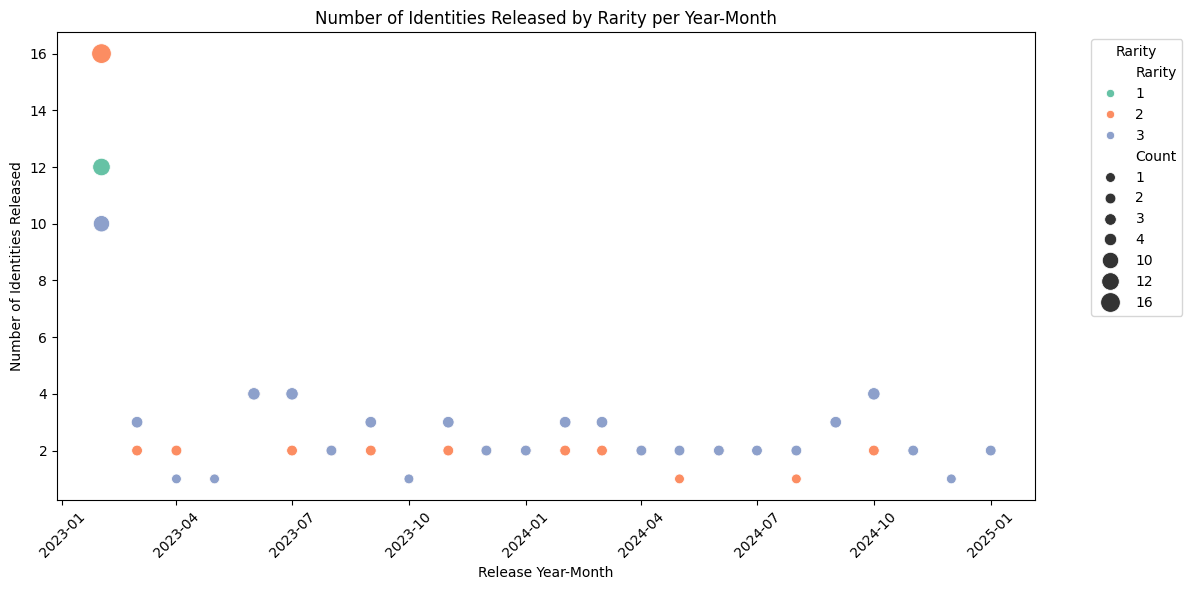

In [13]:
# 년-월 형식으로 새로운 컬럼 'Release_Year_Month' 생성 (datetime으로 변환)
identities_df['Release_Year_Month'] = identities_df['Release_Date'].dt.to_period('M').dt.to_timestamp()

# 년-월, Rarity별로 출시된 인격 수 계산
rarity_monthly_count = identities_df.groupby(['Release_Year_Month', 'Rarity']).size().reset_index(name='Count')

# 점 그래프 그리기
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 현재 Axes 객체를 가져옵니다.
sns.scatterplot(data=rarity_monthly_count, x='Release_Year_Month', y='Count', hue='Rarity', size='Count', sizes=(50, 200), palette="Set2", legend='full', ax=ax)

plt.title('Number of Identities Released by Rarity per Year-Month')
plt.xlabel('Release Year-Month')
plt.ylabel('Number of Identities Released')
plt.xticks(rotation=45)
plt.legend(title='Rarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
identities_df

,ID,Name,Rarity,Release_Date,Release_Month,Release_Year,Release_Day
0,10101,[LCB Sinner] Yi Sang,1,2023-02-27,2,2023,27
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2023-02-27,2,2023,27
2,10103,[Blade Lineage Salsu] Yi Sang,3,2023-02-27,2,2023,27
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,2023-06-15,6,2023,15
4,10105,[Molar Office Fixer] Yi Sang,2,2023-09-14,9,2023,14
...,...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,2023-08-10,8,2023,10
122,11207,[Twinhook Pirates First Mate] Gregor,3,2023-11-16,11,2023,16
123,11208,[Kurokumo Clan Captain] Gregor,2,2024-02-22,2,2024,22
124,11209,[Edgar Family Heir] Gregor,3,2024-04-04,4,2024,4


In [15]:
identities_df = identities_df.drop(columns=['Release_Date','Release_Year_Month'])

In [16]:
identities_df

,ID,Name,Rarity,Release_Month,Release_Year,Release_Day
0,10101,[LCB Sinner] Yi Sang,1,2,2023,27
1,10102,[Seven Assoc. South Section 6] Yi Sang,2,2,2023,27
2,10103,[Blade Lineage Salsu] Yi Sang,3,2,2023,27
3,10104,[Effloresced E.G.O::Spicebush] Yi Sang,3,6,2023,15
4,10105,[Molar Office Fixer] Yi Sang,2,9,2023,14
...,...,...,...,...,...,...
121,11206,[Zwei Assoc. South Section 4] Gregor,3,8,2023,10
122,11207,[Twinhook Pirates First Mate] Gregor,3,11,2023,16
123,11208,[Kurokumo Clan Captain] Gregor,2,2,2024,22
124,11209,[Edgar Family Heir] Gregor,3,4,2024,4


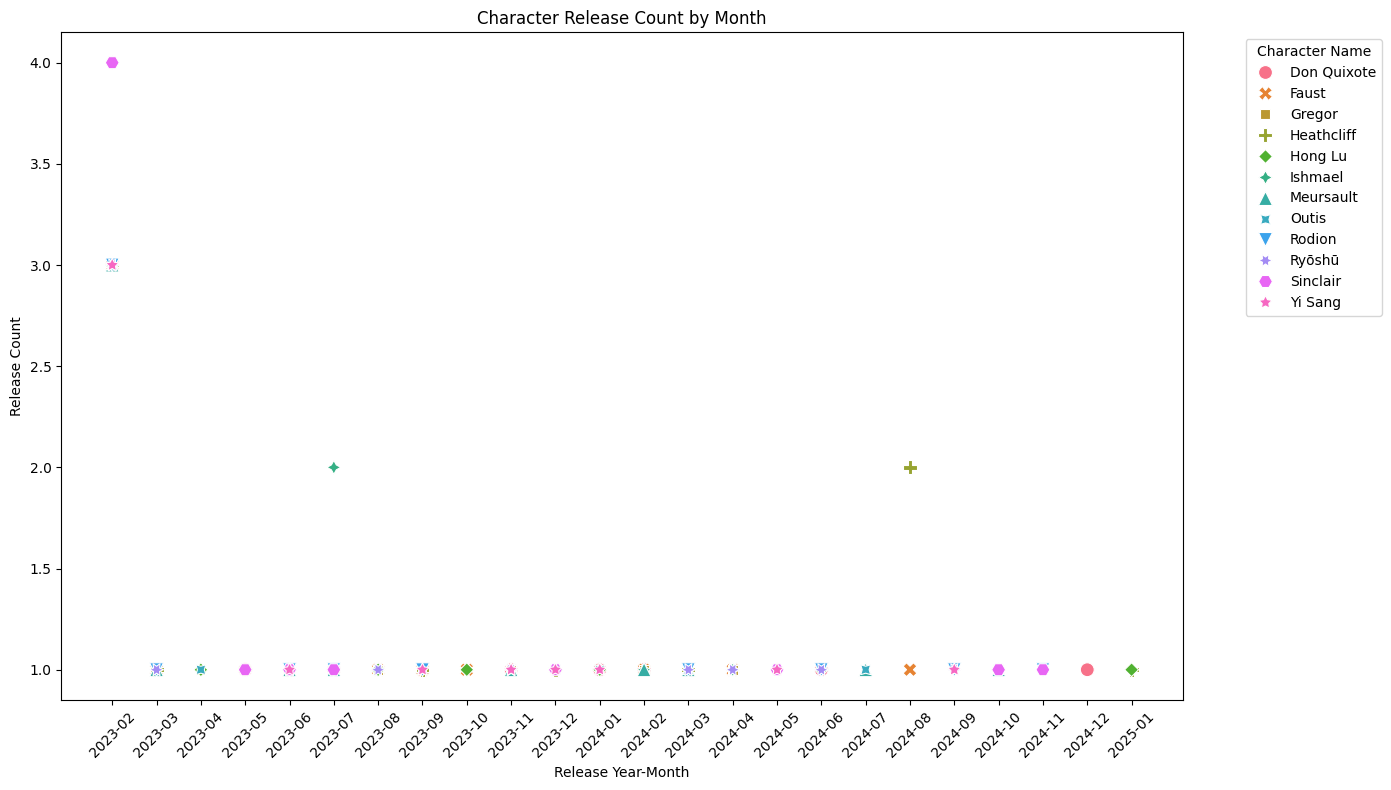

In [19]:
import re
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)

# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 그래프 시각화
plt.figure(figsize=(14, 8))

# 각 캐릭터별로 시계열 점 그래프를 그립니다.
scatter_plot = sns.scatterplot(data=character_release_count, x='Release_Year_Month', y='Count', hue='Character_Name', style='Character_Name', markers=True, s=100)

# 제목과 축 설정
plt.title('Character Release Count by Month')
plt.xlabel('Release Year-Month')
plt.ylabel('Release Count')
plt.xticks(rotation=45)

# 범례 수동 설정
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Character Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# 그래프 출력
plt.show()


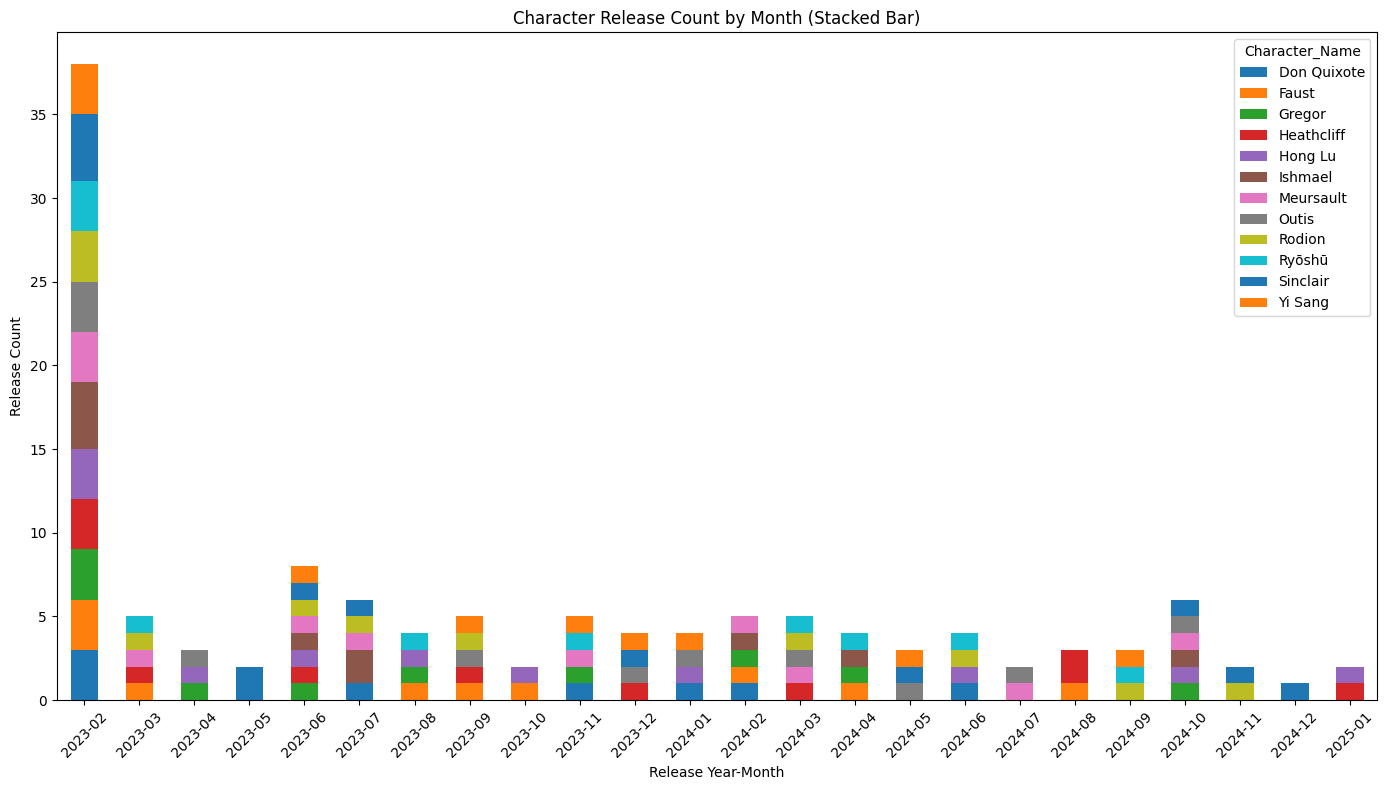

In [20]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)

# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 피벗 테이블을 사용하여 데이터 변환 (각 캐릭터별로 컬럼 생성)
pivot_df = character_release_count.pivot_table(index='Release_Year_Month', columns='Character_Name', values='Count', aggfunc='sum', fill_value=0)

# 5. 누적 막대 그래프 시각화
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

# 제목과 축 설정
plt.title('Character Release Count by Month (Stacked Bar)')
plt.xlabel('Release Year-Month')
plt.ylabel('Release Count')
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


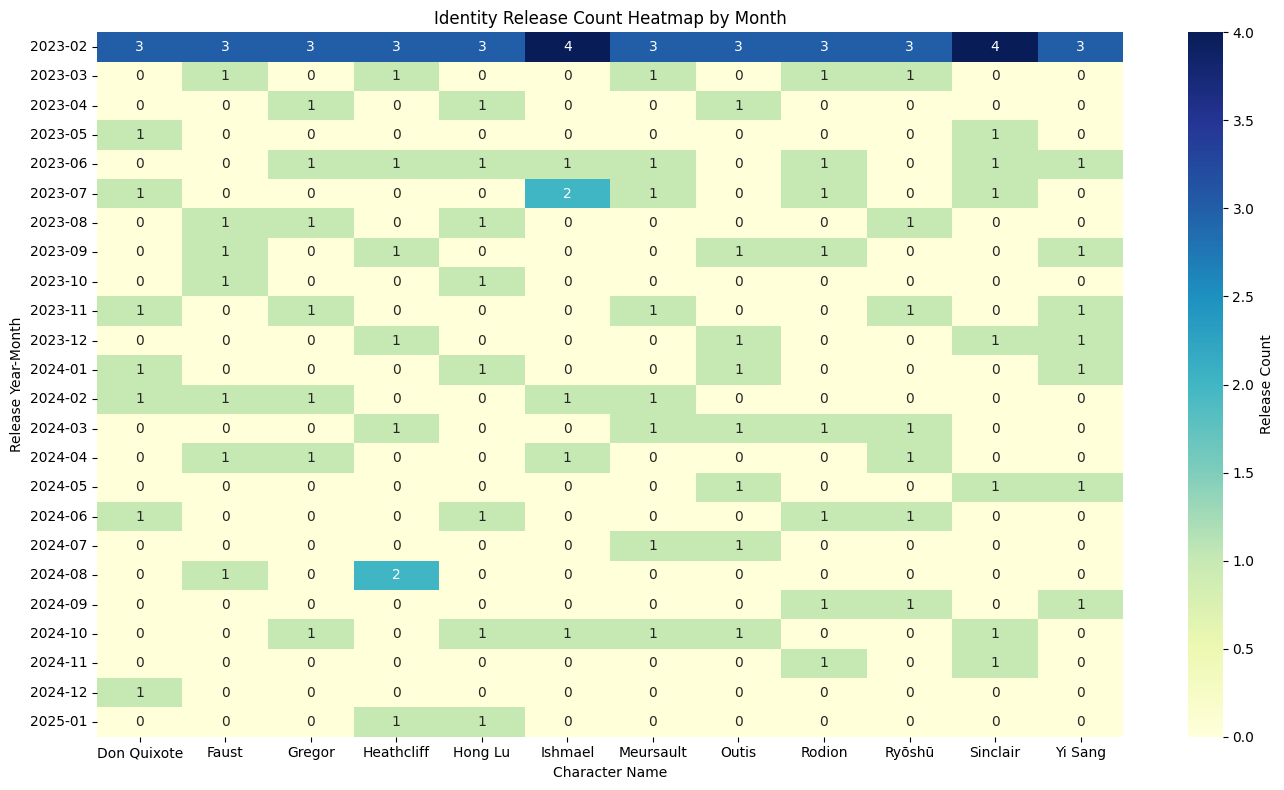

In [21]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 'Release_Year_Month' 컬럼 생성 (Release_Year + Release_Month)
identities_type_df['Release_Year_Month'] = identities_type_df['Release_Year'].astype(str) + '-' + identities_type_df['Release_Month'].astype(str).str.zfill(2)
 
# 3. 'Release_Year_Month'와 'Character_Name'별로 집계된 데이터프레임 생성
character_release_count = identities_type_df.groupby(['Release_Year_Month', 'Character_Name']).size().reset_index(name='Count')

# 4. 피벗 테이블을 사용하여 데이터 변환 (각 캐릭터별로 컬럼 생성)
pivot_df = character_release_count.pivot_table(index='Release_Year_Month', columns='Character_Name', values='Count', aggfunc='sum', fill_value=0)

# 5. 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Release Count'})

# 제목과 축 설정
plt.title('Identity Release Count Heatmap by Month')
plt.xlabel('Character Name')
plt.ylabel('Release Year-Month')

# 그래프 출력
plt.tight_layout()
plt.show()


In [22]:
import re

# 'Name' 컬럼에서 ']' 뒤에 있는 첫 번째 단어 추출 (공백을 무시하고 단어 추출)
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1) if re.search(r'\](.*)', x) else None
)

# 결과 확인
identities_type_df[['Name', 'Character_Name']].head(10)


,Name,Character_Name
0,[LCB Sinner] Yi Sang,Yi Sang
1,[Seven Assoc. South Section 6] Yi Sang,Yi Sang
2,[Blade Lineage Salsu] Yi Sang,Yi Sang
3,[Effloresced E.G.O::Spicebush] Yi Sang,Yi Sang
4,[Molar Office Fixer] Yi Sang,Yi Sang
5,[W Corp. L3 Cleanup Agent] Yi Sang,Yi Sang
6,[The Pequod First Mate] Yi Sang,Yi Sang
7,[Dieci Assoc. South Section 4] Yi Sang,Yi Sang
8,[The Ring Pointillist Student] Yi Sang,Yi Sang
9,[Lobotomy E.G.O::Solemn Lament] Yi Sang,Yi Sang


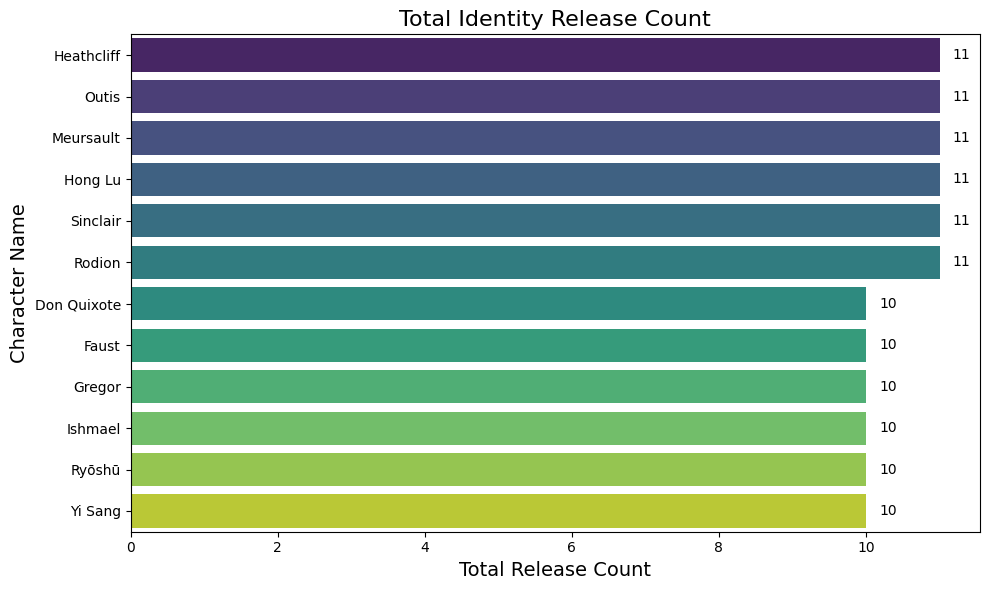

In [24]:
# 새로운 데이터프레임 생성
identities_type_df = identities_df.copy()

# 'Name' 컬럼에서 ']' 뒤에 있는 모든 문자 추출
identities_type_df['Character_Name'] = identities_type_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1).strip() if re.search(r'\](.*)', x) else None
)

# 1. 'Character_Name'별로 출시 횟수 집계
character_total_release = identities_type_df.groupby('Character_Name').size().reset_index(name='Total_Count')

# 2. 출시 횟수를 내림차순으로 정렬
character_total_release = character_total_release.sort_values(by='Total_Count', ascending=False)

# 3. 막대 그래프 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Total_Count', y='Character_Name', data=character_total_release, hue='Character_Name', palette='viridis')

# x축 끝에 텍스트 추가
max_value = character_total_release.max()  # x축 최대 값
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + .3 , p.get_y() + p.get_height() / 2,
            f'{p.get_width():,.0f}',  # p.get_width()는 막대의 값입니다
            ha='center', va='center', color='black')

# 제목과 축 설정
plt.title('Total Identity Release Count', fontsize=16)
plt.xlabel('Total Release Count', fontsize=14)
plt.ylabel('Character Name', fontsize=14)


# 그래프 출력
plt.tight_layout()
plt.show()

In [11]:
identities_type_df

NameError: name 'identities_type_df' is not defined

In [26]:
identities_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              126 non-null    int64 
 1   Name            126 non-null    object
 2   Rarity          126 non-null    int64 
 3   Release_Month   126 non-null    int32 
 4   Release_Year    126 non-null    int32 
 5   Release_Day     126 non-null    int32 
 6   Character_Name  126 non-null    object
dtypes: int32(3), int64(2), object(2)
memory usage: 5.5+ KB


In [12]:
level_stats_df = level_stats
uptie_stats_df = uptie_stats

In [13]:
level_stats_df

,Identity_ID,Level,HP,Defense,Skill_Levels
0,10101,1,74,1,"[""SKILL 1: 1"", ""SKILL 2: 1"", ""SKILL 3: 1"", ""DE..."
1,10101,2,77,1,"[""SKILL 1: 2"", ""SKILL 2: 2"", ""SKILL 3: 2"", ""DE..."
2,10101,3,79,1,"[""SKILL 1: 3"", ""SKILL 2: 3"", ""SKILL 3: 3"", ""DE..."
3,10101,4,82,2,"[""SKILL 1: 4"", ""SKILL 2: 4"", ""SKILL 3: 4"", ""DE..."
4,10101,5,84,3,"[""SKILL 1: 5"", ""SKILL 2: 5"", ""SKILL 3: 5"", ""DE..."
...,...,...,...,...,...
6295,11210,46,265,51,"[""SKILL 1: 47"", ""SKILL 2: 47"", ""SKILL 3: 49"", ..."
6296,11210,47,268,52,"[""SKILL 1: 48"", ""SKILL 2: 48"", ""SKILL 3: 50"", ..."
6297,11210,48,272,53,"[""SKILL 1: 49"", ""SKILL 2: 49"", ""SKILL 3: 51"", ..."
6298,11210,49,275,54,"[""SKILL 1: 50"", ""SKILL 2: 50"", ""SKILL 3: 52"", ..."


In [14]:
uptie_stats_df = uptie_stats_df.drop(columns=['Speed'])

In [15]:
uptie_stats_df

,Identity_ID,Uptie,MinSpeed,MaxSpeed
0,10101,1,4,6
1,10101,2,4,7
2,10101,3,4,8
3,10101,4,4,8
4,10102,1,5,6
...,...,...,...,...
499,11209,4,3,8
500,11210,1,3,5
501,11210,2,3,5
502,11210,3,4,6


In [16]:
skills_df = skills

In [17]:
skills_df['Skill_Code'] = skills_df['Skill_Code'].str.upper()

In [18]:
skills_df = skills_df.drop(columns=['Max_Level'])

In [19]:
skills_df

,Identity_ID,Skill_Code,Skill_Type,Sin_Affinity,Skill_Name,Coin_Count,Init_Remain,Atk_Weight,Uptie_Level,Skill_Power,Coin_Power,Effect_Data
0,10101,SKILL 1,SLASH,Gloom,Deflect,1,3x,1,1,2,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In..."
1,10101,SKILL 1,SLASH,Gloom,Deflect,1,3x,1,2,2,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In..."
2,10101,SKILL 1,SLASH,Gloom,Deflect,1,3x,1,3,3,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In..."
3,10101,SKILL 1,SLASH,Gloom,Deflect,1,3x,1,4,4,7,"{""[Coin 1 On Hit]"": [], ""[On Hit]"": [""Inflict ..."
4,10101,SKILL 2,PENETRATE,Envy,End-stop Stab,2,2x,1,1,3,4,"{""[Coin 2 Heads Hit]"": [], ""[Heads Hit]"": [""In..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,11210,SKILL 3,HIT,Lust,The Unforgivable Sin,3,1x,1,4,5,4,"{""[On Use]"": [""Deal + 1 . 5 % more damage for ..."
1826,11210,DEFENSE,GUARD,Lust,Faded Patience,1,-1,0,1,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG..."
1827,11210,DEFENSE,GUARD,Lust,Faded Patience,1,-1,0,2,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG..."
1828,11210,DEFENSE,GUARD,Lust,Faded Patience,1,-1,0,3,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG..."


In [20]:
df = pd.DataFrame(level_stats_df)

In [21]:
import ast
# Skill_Levels를 Skill_Code와 Skill_Level로 분할하고 데이터프레임 확장
expanded_rows = []

for _, row in df.iterrows():
    # 문자열 정리
    skill_levels_raw = row['Skill_Levels'].replace('\n', '').strip()
    # 문자열을 리스트 변환
    try:
        skill_levels = ast.literal_eval(skill_levels_raw)
    except ValueError as e:
        print(f"Error parsing Skill_Levels for Identity_ID {row['Identity_ID']}: {e}")
        continue
        
    #print(skill_levels)
    for skill in skill_levels:
        try:
            skill_code, skill_level = skill.split(': ')
            expanded_rows.append({
                'Identity_ID': row['Identity_ID'],
                'Level': row['Level'],
                'HP': row['HP'],
                'Defense': row['Defense'],
                'Skill_Code': skill_code.strip(),
                'Skill_Level': int(skill_level)
            })
        except ValueError as e:
            print(f"Error splitting skill entry '{skill}' for Identity_ID {row['Identity_ID']}: {e}")
            continue

# 확장된 데이터프레임 생성
level_stats_expanded_df = pd.DataFrame(expanded_rows)

# 결과 출력
print(level_stats_expanded_df)

       Identity_ID  Level   HP  Defense Skill_Code  Skill_Level
0            10101      1   74        1    SKILL 1            1
1            10101      1   74        1    SKILL 2            1
2            10101      1   74        1    SKILL 3            1
3            10101      1   74        1    DEFENSE            1
4            10101      2   77        1    SKILL 1            2
...            ...    ...  ...      ...        ...          ...
26195        11210     49  275       54    DEFENSE           54
26196        11210     50  279       55    SKILL 1           51
26197        11210     50  279       55    SKILL 2           51
26198        11210     50  279       55    SKILL 3           53
26199        11210     50  279       55    DEFENSE           55

[26200 rows x 6 columns]


In [22]:
skills_level_df = level_stats_expanded_df

In [23]:
skills_level_df

,Identity_ID,Level,HP,Defense,Skill_Code,Skill_Level
0,10101,1,74,1,SKILL 1,1
1,10101,1,74,1,SKILL 2,1
2,10101,1,74,1,SKILL 3,1
3,10101,1,74,1,DEFENSE,1
4,10101,2,77,1,SKILL 1,2
...,...,...,...,...,...,...
26195,11210,49,275,54,DEFENSE,54
26196,11210,50,279,55,SKILL 1,51
26197,11210,50,279,55,SKILL 2,51
26198,11210,50,279,55,SKILL 3,53


In [24]:
uptie_stats_df

,Identity_ID,Uptie,MinSpeed,MaxSpeed
0,10101,1,4,6
1,10101,2,4,7
2,10101,3,4,8
3,10101,4,4,8
4,10102,1,5,6
...,...,...,...,...
499,11209,4,3,8
500,11210,1,3,5
501,11210,2,3,5
502,11210,3,4,6


In [25]:
skills_df = skills

In [26]:
skills_df['processed'] = False

In [27]:
skills_df

,Identity_ID,Skill_Code,Skill_Type,Sin_Affinity,Skill_Name,Coin_Count,Max_Level,Init_Remain,Atk_Weight,Uptie_Level,Skill_Power,Coin_Power,Effect_Data,processed
0,10101,SKILL 1,SLASH,Gloom,Deflect,1,50,3x,1,1,2,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In...",False
1,10101,SKILL 1,SLASH,Gloom,Deflect,1,50,3x,1,2,2,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In...",False
2,10101,SKILL 1,SLASH,Gloom,Deflect,1,50,3x,1,3,3,7,"{""[Coin 1 Heads Hit]"": [], ""[Heads Hit]"": [""In...",False
3,10101,SKILL 1,SLASH,Gloom,Deflect,1,50,3x,1,4,4,7,"{""[Coin 1 On Hit]"": [], ""[On Hit]"": [""Inflict ...",False
4,10101,SKILL 2,PENETRATE,Envy,End-stop Stab,2,50,2x,1,1,3,4,"{""[Coin 2 Heads Hit]"": [], ""[Heads Hit]"": [""In...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,11210,SKILL 3,HIT,Lust,The Unforgivable Sin,3,53,1x,1,4,5,4,"{""[On Use]"": [""Deal + 1 . 5 % more damage for ...",False
1826,11210,DEFENSE,GUARD,Lust,Faded Patience,1,55,-1,0,1,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG...",False
1827,11210,DEFENSE,GUARD,Lust,Faded Patience,1,55,-1,0,2,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG...",False
1828,11210,DEFENSE,GUARD,Lust,Faded Patience,1,55,-1,0,3,15,5,"{""[Combat Start]"": [""Gain 3 keyword:WornHeartG...",False


In [30]:
results = []
for level in skills_level_df['Level'].unique():
    #print(level)
    skills_df['processed']=False
    level_data = skills_level_df[skills_level_df['Level'] == level]
    #print(level_data)
    for _, row in level_data.iterrows():
        identity_id = row['Identity_ID']
        skill_code = row['Skill_Code']
        skill_level = row['Skill_Level']
        skill_data = skills_df[
            (skills_df['Identity_ID'] == identity_id) &
            (skills_df['Skill_Code'] == skill_code) &
            (~skills_df['processed'])
        ]
        if not skill_data.empty:
            skill_row = skill_data.iloc[0]

            result = {
                'Identity_ID': identity_id,
                'Level': level,
                'Skill_Code': skill_code,
                'Uptie_Level': skill_row['Uptie_Level'],
                'Skill_Level': skill_level,
                'Skill_Power': skill_row['Skill_Power'],
                'Coin_Power': skill_row['Coin_Power'],
            }
            results.append(result)
            skills_df.loc[skill_row.name, 'processed'] = True

processed_df = pd.DataFrame(results)

In [56]:
import pandas as pd

# Uptie_Level 시작 조건에 따라 처리
processed_data = []

for _, skill_row in skills_level_df.iterrows():
    identity_id = skill_row["Identity_ID"]
    level = skill_row["Level"]
    skill_code = skill_row["Skill_Code"]
    skill_level = skill_row["Skill_Level"]
    
    # skills_df에서 해당 Identity_ID와 Skill_Code의 최소 Uptie_Level을 가져옴
    skill_filter = (skills_df["Identity_ID"] == identity_id) & (skills_df["Skill_Code"] == skill_code)
    skill_subset = skills_df[skill_filter]
    
    if skill_subset.empty:
        continue  # 해당 스킬이 없으면 건너뜀
    
    min_uptie_level = skill_subset["Uptie_Level"].min()  # 최소 Uptie_Level 확인
    
    for uptie_level in range(min_uptie_level, 5):  # 최소 Uptie_Level부터 4까지 처리
        filtered_skill = skill_subset[skill_subset["Uptie_Level"] == uptie_level]
        if not filtered_skill.empty:
            sin_affinity = filtered_skill["Sin_Affinity"].values[0]
            skill_type = filtered_skill["Skill_Type"].values[0]
            coin_count = filtered_skill["Coin_Count"].values[0]
            skill_power = filtered_skill["Skill_Power"].values[0]
            atk_weight = filtered_skill["Atk_Weight"].values[0]
            coin_power = filtered_skill["Coin_Power"].values[0]
            
            processed_data.append({
                "Identity_ID": identity_id,
                "Level": level,
                "Sin_Affinity": sin_affinity,
                "Skill_Type": skill_type,
                "Skill_Code": skill_code,
                "Skill_Level": skill_level,
                "Uptie_Level": uptie_level,
                "Skill_Power": skill_power,
                "Atk_Weight": atk_weight,
                "Coin_Count": coin_count,
                "Coin_Power": coin_power,
            })

# 결과를 DataFrame으로 변환
processed_df = pd.DataFrame(processed_data)

# CSV 파일로 저장
output_file_path = "./csv/processed_skills.csv"
processed_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/processed_skills.csv


In [57]:
processed_df["Sin_Affinity"].unique()

array(['Gloom', 'Envy', 'Sloth', 'Gluttony', 'Pride', 'Wrath', 'Lust'],
      dtype=object)

In [58]:
processed_df["Skill_Type"].unique()

array(['SLASH', 'PENETRATE', 'GUARD', 'HIT', 'COUNTER', 'EVADE', 'ATTACK'],
      dtype=object)

In [59]:
processed_df["Skill_Code"].unique()

array(['SKILL 1', 'SKILL 2', 'SKILL 3', 'DEFENSE'], dtype=object)

In [62]:
onehot_processed_df = processed_df.copy()

In [63]:
onehot_processed_df = pd.get_dummies(onehot_processed_df, columns=["Sin_Affinity", "Skill_Type", "Skill_Code"])

In [64]:
onehot_processed_df.head()

,Identity_ID,Level,Skill_Level,Uptie_Level,Skill_Power,Atk_Weight,Coin_Count,Coin_Power,Sin_Affinity_Envy,Sin_Affinity_Gloom,...,Skill_Type_COUNTER,Skill_Type_EVADE,Skill_Type_GUARD,Skill_Type_HIT,Skill_Type_PENETRATE,Skill_Type_SLASH,Skill_Code_DEFENSE,Skill_Code_SKILL 1,Skill_Code_SKILL 2,Skill_Code_SKILL 3
0,10101,1,1,1,2,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
1,10101,1,1,2,2,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
2,10101,1,1,3,3,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
3,10101,1,1,4,4,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
4,10101,1,1,1,3,1,2,4,True,False,...,False,False,False,False,True,False,False,False,True,False


In [65]:
print(onehot_processed_df.head())

   Identity_ID  Level  Skill_Level  Uptie_Level  Skill_Power  Atk_Weight  \
0        10101      1            1            1            2           1   
1        10101      1            1            2            2           1   
2        10101      1            1            3            3           1   
3        10101      1            1            4            4           1   
4        10101      1            1            1            3           1   

   Coin_Count  Coin_Power  Sin_Affinity_Envy  Sin_Affinity_Gloom  ...  \
0           1           7              False                True  ...   
1           1           7              False                True  ...   
2           1           7              False                True  ...   
3           1           7              False                True  ...   
4           2           4               True               False  ...   

   Skill_Type_COUNTER  Skill_Type_EVADE  Skill_Type_GUARD  Skill_Type_HIT  \
0               False      

In [67]:
onehot_processed_df

,Identity_ID,Level,Skill_Level,Uptie_Level,Skill_Power,Atk_Weight,Coin_Count,Coin_Power,Sin_Affinity_Envy,Sin_Affinity_Gloom,...,Skill_Type_COUNTER,Skill_Type_EVADE,Skill_Type_GUARD,Skill_Type_HIT,Skill_Type_PENETRATE,Skill_Type_SLASH,Skill_Code_DEFENSE,Skill_Code_SKILL 1,Skill_Code_SKILL 2,Skill_Code_SKILL 3
0,10101,1,1,1,2,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
1,10101,1,1,2,2,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
2,10101,1,1,3,3,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
3,10101,1,1,4,4,1,1,7,False,True,...,False,False,False,False,False,True,False,True,False,False
4,10101,1,1,1,3,1,2,4,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91495,11210,50,53,4,5,1,3,4,False,False,...,False,False,False,True,False,False,False,False,False,True
91496,11210,50,55,1,15,0,1,5,False,False,...,False,False,True,False,False,False,True,False,False,False
91497,11210,50,55,2,15,0,1,5,False,False,...,False,False,True,False,False,False,True,False,False,False
91498,11210,50,55,3,15,0,1,5,False,False,...,False,False,True,False,False,False,True,False,False,False


In [68]:
onehot_processed_df.sum()

Identity_ID              975499600
Level                      2333250
Skill_Level                2478170
Uptie_Level                 242050
Skill_Power                 462200
Atk_Weight                   64500
Coin_Count                  171300
Coin_Power                  452000
Sin_Affinity_Envy            11800
Sin_Affinity_Gloom           15600
Sin_Affinity_Gluttony        12200
Sin_Affinity_Lust            13200
Sin_Affinity_Pride           14500
Sin_Affinity_Sloth           12100
Sin_Affinity_Wrath           12100
Skill_Type_ATTACK             2200
Skill_Type_COUNTER            5600
Skill_Type_EVADE              6400
Skill_Type_GUARD             12800
Skill_Type_HIT               24100
Skill_Type_PENETRATE         21000
Skill_Type_SLASH             19400
Skill_Code_DEFENSE           27000
Skill_Code_SKILL 1           25600
Skill_Code_SKILL 2           25600
Skill_Code_SKILL 3           13300
dtype: int64

In [69]:
# 원핫 인코딩된 데이터에서 상관 행렬 계산
correlation_matrix = onehot_processed_df.corr()

# 상관 행렬을 출력
print(correlation_matrix)

                        Identity_ID         Level  Skill_Level   Uptie_Level  \
Identity_ID            1.000000e+00 -1.821442e-14    -0.006204  7.530084e-04   
Level                 -1.821442e-14  1.000000e+00     0.990144 -2.694601e-17   
Skill_Level           -6.204325e-03  9.901436e-01     1.000000  6.764568e-03   
Uptie_Level            7.530084e-04 -2.694601e-17     0.006765  1.000000e+00   
Skill_Power            8.968092e-02 -1.693858e-15     0.026721  1.097928e-01   
Atk_Weight            -3.442666e-03  5.154283e-17     0.006838  8.483582e-02   
Coin_Count            -2.188617e-02  1.405469e-16     0.028516  1.459218e-01   
Coin_Power            -1.450972e-02  2.346521e-16    -0.023811  2.176371e-02   
Sin_Affinity_Envy     -7.553271e-02  1.464439e-15     0.008633 -1.515462e-02   
Sin_Affinity_Gloom    -6.485612e-03 -3.615355e-16    -0.008968 -1.770643e-03   
Sin_Affinity_Gluttony  6.878079e-02 -1.381865e-15    -0.000169 -5.027039e-03   
Sin_Affinity_Lust     -3.208945e-02  8.1

In [75]:
grouped = processed_df.groupby('Sin_Affinity')['Skill_Level'].mean()

# 결과 출력
print(grouped)

Sin_Affinity
Envy        27.410508
Gloom       26.795769
Gluttony    27.077541
Lust        27.165758
Pride       27.205793
Sloth       26.759174
Wrath       27.232066
Name: Skill_Level, dtype: float64


In [76]:
grouped = processed_df.groupby('Skill_Type')['Skill_Level'].mean()

# 결과 출력
print(grouped)

Skill_Type
ATTACK       28.045455
COUNTER      28.428571
EVADE        25.076250
GUARD        27.009375
HIT          26.680166
PENETRATE    27.478571
SLASH        27.372165
Name: Skill_Level, dtype: float64


In [77]:
grouped = processed_df.groupby('Skill_Code')['Skill_Level'].mean()

# 결과 출력
print(grouped)

Skill_Code
DEFENSE    26.929926
SKILL 1    26.841250
SKILL 2    27.098437
SKILL 3    27.835038
Name: Skill_Level, dtype: float64


In [74]:
# CSV 파일로 저장
output_file_path = "./csv/onehot_dataframe.csv"
onehot_processed_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/onehot_dataframe.csv


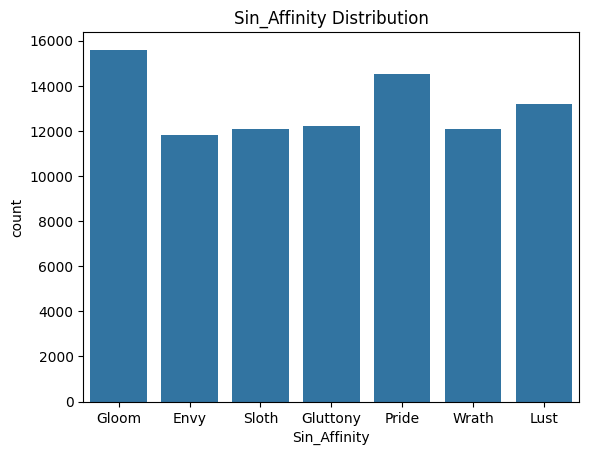

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Sin_Affinity' 값별로 카테고리 분포를 시각화
sns.countplot(data=processed_df, x='Sin_Affinity')
plt.title('Sin_Affinity Distribution')
plt.show()

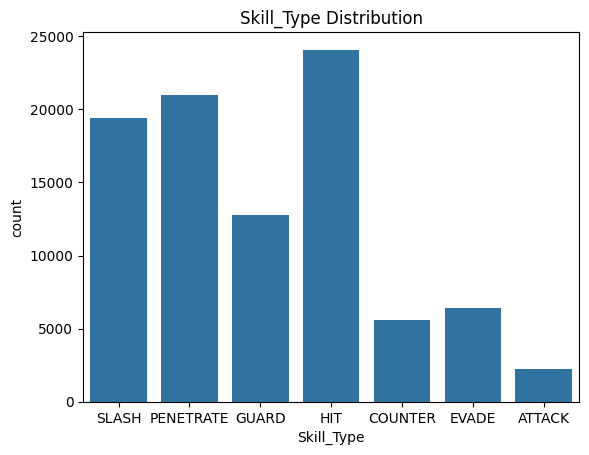

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Sin_Affinity' 값별로 카테고리 분포를 시각화
sns.countplot(data=processed_df, x='Skill_Type')
plt.title('Skill_Type Distribution')
plt.show()

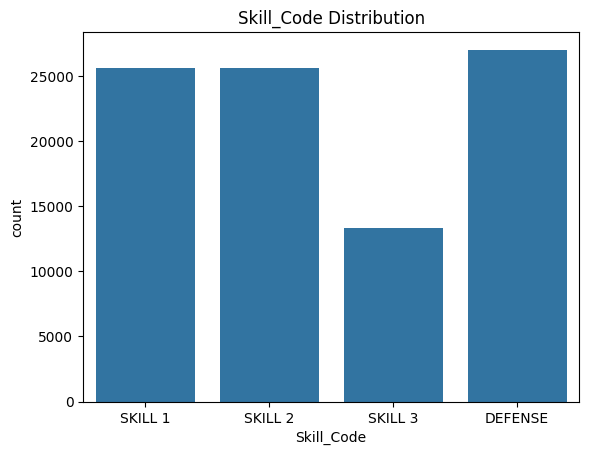

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Sin_Affinity' 값별로 카테고리 분포를 시각화
sns.countplot(data=processed_df, x='Skill_Code')
plt.title('Skill_Code Distribution')
plt.show()

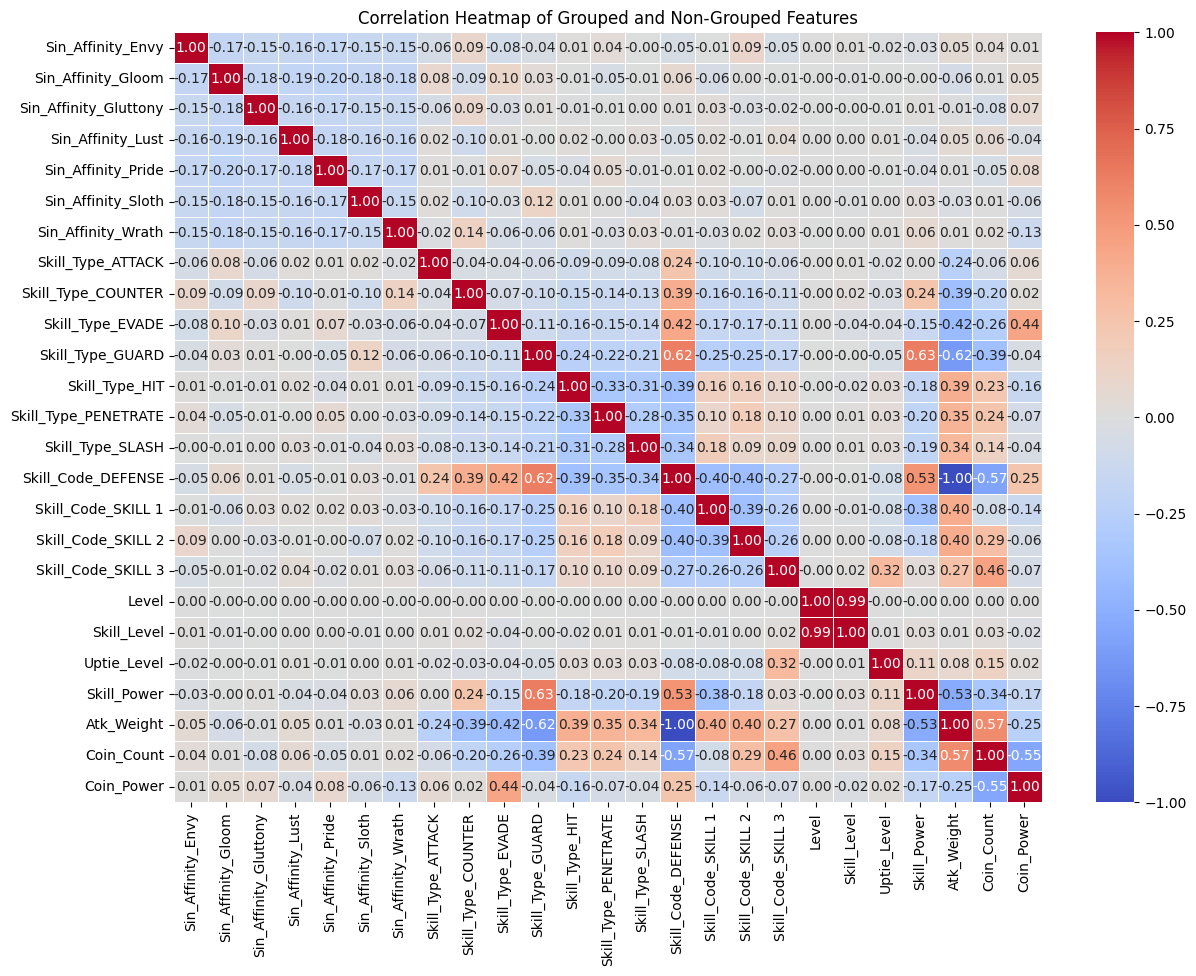

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수를 원핫 인코딩
categorical_columns = ['Sin_Affinity', 'Skill_Type', 'Skill_Code']
processed_df_encoded = pd.get_dummies(processed_df[categorical_columns])

# 원핫 인코딩된 데이터와 그룹화되지 않은 수치형 데이터를 합침
numerical_columns = ['Level', 'Skill_Level', 'Uptie_Level', 'Skill_Power', 'Atk_Weight', 'Coin_Count', 'Coin_Power']
processed_df_final = pd.concat([processed_df_encoded, processed_df[numerical_columns]], axis=1)

# NaN 값을 평균으로 채우기
processed_df_final_filled = processed_df_final.apply(lambda x: x.fillna(x.mean()), axis=0)

# 전체 데이터에 대해 상관 행렬 계산
correlation_matrix = processed_df_final_filled.corr()

# 상관 행렬 히트맵 출력
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Grouped and Non-Grouped Features')
plt.show()

In [84]:
onehot_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91500 entries, 0 to 91499
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Identity_ID            91500 non-null  int64
 1   Level                  91500 non-null  int64
 2   Skill_Level            91500 non-null  int64
 3   Uptie_Level            91500 non-null  int64
 4   Skill_Power            91500 non-null  int64
 5   Atk_Weight             91500 non-null  int64
 6   Coin_Count             91500 non-null  int64
 7   Coin_Power             91500 non-null  int64
 8   Sin_Affinity_Envy      91500 non-null  bool 
 9   Sin_Affinity_Gloom     91500 non-null  bool 
 10  Sin_Affinity_Gluttony  91500 non-null  bool 
 11  Sin_Affinity_Lust      91500 non-null  bool 
 12  Sin_Affinity_Pride     91500 non-null  bool 
 13  Sin_Affinity_Sloth     91500 non-null  bool 
 14  Sin_Affinity_Wrath     91500 non-null  bool 
 15  Skill_Type_ATTACK      91500 non-nul

In [85]:
# 각 열에 있는 NaN 값의 개수 확인
nan_count = onehot_processed_df.isna().sum()
print(nan_count)

# NaN 값이 포함된 행들만 확인
nan_rows = onehot_processed_df[onehot_processed_df.isna().any(axis=1)]
print(nan_rows)

Identity_ID              0
Level                    0
Skill_Level              0
Uptie_Level              0
Skill_Power              0
Atk_Weight               0
Coin_Count               0
Coin_Power               0
Sin_Affinity_Envy        0
Sin_Affinity_Gloom       0
Sin_Affinity_Gluttony    0
Sin_Affinity_Lust        0
Sin_Affinity_Pride       0
Sin_Affinity_Sloth       0
Sin_Affinity_Wrath       0
Skill_Type_ATTACK        0
Skill_Type_COUNTER       0
Skill_Type_EVADE         0
Skill_Type_GUARD         0
Skill_Type_HIT           0
Skill_Type_PENETRATE     0
Skill_Type_SLASH         0
Skill_Code_DEFENSE       0
Skill_Code_SKILL 1       0
Skill_Code_SKILL 2       0
Skill_Code_SKILL 3       0
dtype: int64
Empty DataFrame
Columns: [Identity_ID, Level, Skill_Level, Uptie_Level, Skill_Power, Atk_Weight, Coin_Count, Coin_Power, Sin_Affinity_Envy, Sin_Affinity_Gloom, Sin_Affinity_Gluttony, Sin_Affinity_Lust, Sin_Affinity_Pride, Sin_Affinity_Sloth, Sin_Affinity_Wrath, Skill_Type_ATTACK, Skil

In [86]:
onehot_processed_df.describe()

,Identity_ID,Level,Skill_Level,Uptie_Level,Skill_Power,Atk_Weight,Coin_Count,Coin_Power
count,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000
mean,10661.197814,25.500000,27.083825,2.645355,5.051366,0.704918,1.872131,4.939891
std,338.695179,14.430949,14.561372,1.108551,2.964761,0.456082,0.905386,3.080130
min,10101.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-12.000000
25%,10402.000000,13.000000,15.000000,2.000000,3.000000,0.000000,1.000000,3.000000
50%,10701.000000,25.500000,27.000000,3.000000,4.000000,1.000000,2.000000,4.000000
75%,10911.000000,38.000000,40.000000,4.000000,6.000000,1.000000,2.000000,6.000000
max,11210.000000,50.000000,56.000000,4.000000,30.000000,1.000000,5.000000,25.000000


In [87]:
print(onehot_processed_df.nunique())

Identity_ID              126
Level                     50
Skill_Level               56
Uptie_Level                4
Skill_Power               18
Atk_Weight                 2
Coin_Count                 5
Coin_Power                25
Sin_Affinity_Envy          2
Sin_Affinity_Gloom         2
Sin_Affinity_Gluttony      2
Sin_Affinity_Lust          2
Sin_Affinity_Pride         2
Sin_Affinity_Sloth         2
Sin_Affinity_Wrath         2
Skill_Type_ATTACK          2
Skill_Type_COUNTER         2
Skill_Type_EVADE           2
Skill_Type_GUARD           2
Skill_Type_HIT             2
Skill_Type_PENETRATE       2
Skill_Type_SLASH           2
Skill_Code_DEFENSE         2
Skill_Code_SKILL 1         2
Skill_Code_SKILL 2         2
Skill_Code_SKILL 3         2
dtype: int64


In [88]:
correlation_matrix = onehot_processed_df.corr()

In [89]:
print(correlation_matrix)

                        Identity_ID         Level  Skill_Level   Uptie_Level  \
Identity_ID            1.000000e+00 -1.821442e-14    -0.006204  7.530084e-04   
Level                 -1.821442e-14  1.000000e+00     0.990144 -2.694601e-17   
Skill_Level           -6.204325e-03  9.901436e-01     1.000000  6.764568e-03   
Uptie_Level            7.530084e-04 -2.694601e-17     0.006765  1.000000e+00   
Skill_Power            8.968092e-02 -1.693858e-15     0.026721  1.097928e-01   
Atk_Weight            -3.442666e-03  5.154283e-17     0.006838  8.483582e-02   
Coin_Count            -2.188617e-02  1.405469e-16     0.028516  1.459218e-01   
Coin_Power            -1.450972e-02  2.346521e-16    -0.023811  2.176371e-02   
Sin_Affinity_Envy     -7.553271e-02  1.464439e-15     0.008633 -1.515462e-02   
Sin_Affinity_Gloom    -6.485612e-03 -3.615355e-16    -0.008968 -1.770643e-03   
Sin_Affinity_Gluttony  6.878079e-02 -1.381865e-15    -0.000169 -5.027039e-03   
Sin_Affinity_Lust     -3.208945e-02  8.1